In [9]:
%matplotlib inline
import numpy as np

In [10]:
train_cnn = np.load("CS5785-final-data/alexnet_feat_train.npy")
train_bow = np.load("CS5785-final-data/SIFTBoW_train.npy")
train_labels = np.genfromtxt("CS5785-final-data/train.txt",dtype=None)
train_labels = train_labels[:,1]

In [11]:
print train_labels

['yard' 'hill' 'ranch_house' ..., 'television_studio' 'street' 'bayou']


In [12]:
#what does the training set look like
labels,counts = np.unique(train_labels,return_counts=True)
print counts
#so there are 200 categories, 15 image for each category

[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15]


In [19]:
#what does the cnn features look like
print train_cnn.shape
print train_cnn[0,:]
print np.mean(train_cnn,axis=0)
print np.var(train_cnn,axis=0)


(3000L, 4096L)
[-1.09959531 -5.25028896  0.65128553 ..., -4.09277916  0.16585439
  0.37292561]
[-3.42435863 -3.46553791 -1.81228862 ..., -1.10022763 -1.89527777
 -2.52920115]
[ 7.60666838  9.90904564  7.98732319 ...,  8.52350122  6.99249138
  8.44972927]


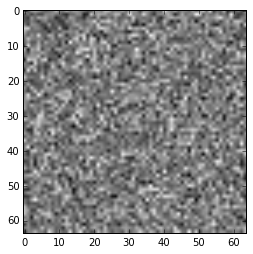

In [17]:
from matplotlib import pylab as plt
import matplotlib.cm as cm

plt.imshow(train_cnn[2,:].reshape(64,64), cmap = cm.Greys_r)

In [6]:
# apply different linear models on cnn features
from sklearn import naive_bayes,linear_model, svm, cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_cnn, train_labels)
lr_cnn = linear_model.LogisticRegression().fit(X_train,y_train).score(X_test,y_test)

In [7]:
print lr_cnn
print svm_cnn

0.362666666667
0.346666666667


In [20]:
from sklearn import preprocessing

X = preprocessing.scale(train_cnn)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, train_labels)
lr_cnn = linear_model.LogisticRegression().fit(X_train,y_train).score(X_test,y_test)

In [21]:
print lr_cnn

0.349333333333


In [ ]:

#Cross validation
gnb_accuracy, lr_accuracy, svm_accuracy = [],[],[],[]
for train, test in  cross_validation.KFold(len(train_bow)):
    X_train,Y_train, X_test,Y_test = train_cnn[train],train_labels[train],train_cnn[test],train_labels[test]
    gnb_accuracy.append(naive_bayes.GaussianNB().fit(X_train,Y_train).score(X_test,Y_test))
    lr_accuracy.append(linear_model.LogisticRegression().fit(X_train,Y_train).score(X_test,Y_test))
    svm_accuracy.append(svm.LinearSVC().fit(X_train,Y_train).score(X_test,Y_test))
print gnb_accuracy
print lr_accuracy
print svm_accuracy